In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('dark_background')
import seaborn as sns
from tqdm import tqdm

import cv2
import os
import tensorflow as tf
import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

print('Using Tensorflow version:', tf.__version__)

Using Tensorflow version: 2.4.1


In [37]:
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')

In [38]:
main_data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [39]:
extra_data

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


## Predicting cellType

In [ ]:
from sklearn, 

trainX, trainY

In [29]:
main_img_list = main_data['ImageName'].tolist()
extra_img_list = extra_data['ImageName'].tolist()

In [30]:
main_img_list = main_data['ImageName'].tolist()
extra_img_list = extra_data['ImageName'].tolist()

print(main_img_list[:5])
print(extra_img_list[:5])

['22405.png', '22406.png', '22407.png', '22408.png', '22409.png']
['12681.png', '12682.png', '12683.png', '12684.png', '12685.png']


In [31]:
def create_img_dataset(directory, img_list):
    IMAGE_SIZE = 27
    train_data = []
    for img in tqdm(img_list, desc='Extracting Image Progress'):
        path = os.path.join(directory, img)
        img = cv2.resize(cv2.imread(path), (IMAGE_SIZE,IMAGE_SIZE))
        train_data.append(np.array(img))
    print("Successfully import images!")
    # Convert to np.array and normalize pixel values to be between 0 and 1 
    return np.array(train_data) / 255.0 

In [32]:
# CHANGE THE PATH TO IMAGE FOLDER IN YOUR LOCAL DEVICE!
path = r"C:\Users\User\Desktop\RMIT\Cloud - GitHub\Minh\ML\Asm\ASM2\patch_images"
X_main = create_img_dataset(path, main_img_list)

Extracting Image Progress: 100%|██████████| 9896/9896 [00:01<00:00, 8776.54it/s]

Successfully import images!


In [33]:
X_main 

array([[[[0.92941176, 0.83529412, 0.94901961],
         [0.91372549, 0.81960784, 0.9372549 ],
         [0.89803922, 0.80392157, 0.92156863],
         ...,
         [0.88627451, 0.76078431, 0.91764706],
         [0.89803922, 0.76862745, 0.92941176],
         [0.89803922, 0.76470588, 0.92941176]],

        [[0.8745098 , 0.78039216, 0.90196078],
         [0.8627451 , 0.76470588, 0.88627451],
         [0.86666667, 0.76470588, 0.88627451],
         ...,
         [0.89803922, 0.76470588, 0.92941176],
         [0.92941176, 0.79607843, 0.96078431],
         [0.87058824, 0.7372549 , 0.90196078]],

        [[0.86666667, 0.76078431, 0.89019608],
         [0.82745098, 0.71764706, 0.84705882],
         [0.85098039, 0.74117647, 0.87058824],
         ...,
         [0.91372549, 0.77647059, 0.94509804],
         [0.89803922, 0.75686275, 0.9254902 ],
         [0.8627451 , 0.7254902 , 0.89411765]],

        ...,

        [[0.88627451, 0.7372549 , 0.90588235],
         [0.82352941, 0.6745098 , 0.84313725]

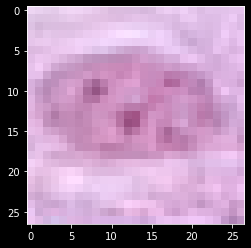

In [34]:
plt.imshow(X_main[0])

In [12]:
y_main =  main_data['cellType'].ravel()
y_main

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [14]:
!pip install keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils